## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [ ]:
import numpy as np
import pandas as pd
import scipy as scipy

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from scipy import linalg


In [ ]:

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

***Answer 1.3 :
In gradient descent we calculate weights/ theta that helps us to move in the direction of the slop or the minimum value. 
After the initial assignment of the weights say W0, the weights are applied, and gradient is calculated for full training set. After it goes through the entire training set, we update these weights by multiplying it with the gradient and alpha or the learning rate. This process in which W0 is applied on entire set for first time is called Epoch. Process when W0 is updated to W1 is called iteration. For a standard gradient descent      
{1 Epoch = 1 iteration}.\
Now, let us see the difference between Epoch and iteration for Stochastic gradient descent (SGD) and mini batch.
1.	For Stochastic gradient descent, Weights changes after every observation i.e. W0 changes to W1 when X0 changes to X1.  if the data has N samples, it will have N iteration or weight update. We complete one epoch only after completing the entire samples. 
For SGD,[ 1 Epoch = N iterations].
2.	For mini batch, we divide the total data in small batch let us say N =  50 (total sample) and 
n = 5 (batches) with, ‘v’ = 10 ( batch size) . Here W0 is updated after every batch. W0 to W1 when n0 goes to n1. This is called one iteration so for the complete set we will have ‘n’ = 5 iterations. And after total 50 samples we will have one Epoch. 
1 epoch = n iterations ( 1 epoch = 5 iteration for our example) 
-So stochastic gradient descent can be perseved as mini batch with batch size of one sample***



In [ ]:
### Part 1 ----------------------------------------------------------------------------------------###
### YOUR CODE HERE ###
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
## Part 1.2  Split data into training , validation and test set ###

X_train,X_temp,y_train,y_temp=train_test_split(df[df.columns[0:40]], df['Goal'], test_size=0.30, random_state=1)
X_val, X_test, y_val, y_test= train_test_split(X_temp,y_temp,test_size=0.5,random_state=1)

#verify shape of data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9625, 40) (9625,)
(2062, 40) (2062,)
(2063, 40) (2063,)


In [ ]:
### Standardize the data ###
scalar = StandardScaler()                        ### Standardization 
scalar.fit(X_train)                              ### fit data on original dataset in numpy format
X_train_std = scalar.transform(X_train)          ### Standardise the X_train
X_val_std = scalar.transform(X_val)              ### Standardise the X_val
X_test_std = scalar.transform(X_test)            ### Standardise the X_test

In [ ]:
##Converting data in np
y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()
y_test_np = y_test.to_numpy()

print(y_train_np.shape)
print(y_val_np.shape)
print(y_test_np.shape)

(9625,)
(2062,)
(2063,)


In [ ]:
(X_train_std.shape)[1]

40

In [ ]:
#add bias column
X_trn_bias = np.hstack(( np.ones((np.shape(X_train_std)[0],1)) , X_train_std))
X_val_bias = np.hstack(( np.ones((np.shape(X_val_std)[0],1)) , X_val_std))
X_test_bias = np.hstack(( np.ones((np.shape(X_test_std)[0],1)) , X_test_std))

In [ ]:
#verify shape of data
print(X_trn_bias.shape)
print(X_val_bias.shape)
print(X_test_bias.shape)

(9625, 41)
(2062, 41)
(2063, 41)


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
###-Part 2----------------------####
### YOUR CODE HERE ###

### Function for RMSE ##
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [ ]:
### Function for direct solution ####

def Direct_sol (X_train_bias,y_train_target, X_val_bias, y_valid_target):          ### Inputs of X in numpy with bias columns added ###
  X_train_fn = X_train_bias
  X_val_fn = X_val_bias
  y_train_fn = y_train_target
  y_valid_fn = y_valid_target
  
  W = np.dot(scipy.linalg.inv(np.dot(X_train_fn.T, X_train_fn)), np.dot(X_train_fn.T, y_train_fn)) # Train the model using training set: finding weights
  y_pred_train_fn = np.dot(X_train_fn, W) # prediction on the training set
  y_pred_valid_fn = np.dot(X_val_fn, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train_fn, y_train_fn)
  RMSE_valid = rmse(y_pred_valid_fn, y_valid_fn)

  print ("RMSE on training set direct solution: " , RMSE_train)
  print ("RMSE on validation set direct solution: " , RMSE_valid)
  return W , y_pred_train_fn , y_pred_valid_fn , RMSE_train , RMSE_valid

In [ ]:
#### Part 2 answer ###

Result_2a = Direct_sol(X_trn_bias, y_train_np , X_val_bias, y_val_np)

RMSE on training set direct solution:  0.00017707758079743764
RMSE on validation set direct solution:  0.00017415588907568788


In [ ]:
## Store RMSE value to be used in further parts ###
RMSE_val_direct = Result_2a[4]
RMSE_val_direct

0.00017415588907568788

## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

--- Total Training Time: 0.5585904121398926 (s) ---
(9625, 1)
(9625, 41)
(1, 41)
RMSE_VAL 0.00017432463730724664
CT 0.00017433004496476354
Epoch to converge :  477


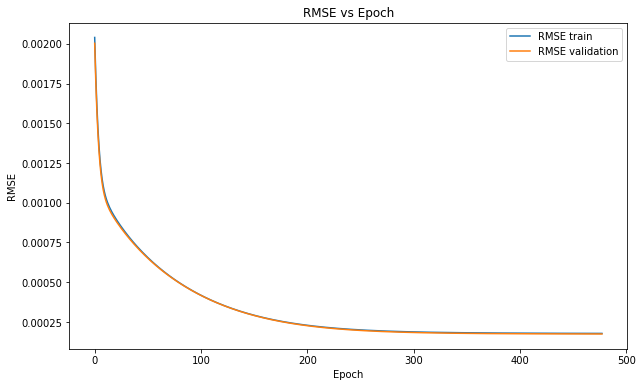

In [ ]:
### Part 3--------------------------------------------##

#w = np.random.uniform(size = 41, low = 0.00001, high = 0.0007) # fix this value  ## alternate method
#w = np.arange(50,91).reshape(1,-1)/100000                      ### alternate method

w = np.arange(70,111).reshape(1,-1)/1000000
lr = 0.01                                   ### Learning rate ## can be done to reduce rate change 
rmse_train_3= np.zeros((0,0))
rmse_val_3= np.zeros((0,0))
CT = 1.001 * RMSE_val_direct               ## Threshold value

import time
start_time = time.time() ## Records current time

for epoch in range (0, 20000): 

  y_pred_train_3 = np.dot(X_trn_bias,w.T).reshape (-1,1)
  gradient = ((1/len(y_pred_train_3) * np.dot(X_trn_bias.T, y_pred_train_3 - y_train_np.reshape(-1,1))).reshape(1,-1))
  
  rmse_train_3 = np.append(rmse_train_3,(rmse(y_pred_train_3 , y_train_np)))

  y_pred_val_3 = np.dot(X_val_bias,w.T).reshape (-1,1)
  rmse_val = rmse(y_pred_val_3,y_val_np)
  rmse_val_3 = np.append(rmse_val_3,(rmse_val))

  if rmse_val >= CT :   ### Compare RMSE direct condition with current rmse val
    w = w - lr * gradient ### weight update
  else:
    break
  
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
print(y_pred_train_3.shape)
#print(y_train_np.shape)
print(X_trn_bias.shape)
print(gradient.shape)
#print(len(rmse_train_3))
print("RMSE_VAL", rmse_val_3[-1])
print("CT",CT)
#print(len(rmse_val_3))
print('Epoch to converge : ', epoch)


fig = plt.figure(figsize=(10, 6))
plt.plot(rmse_train_3,label="RMSE train")
plt.plot(rmse_val_3,label="RMSE validation")
plt.title('RMSE vs Epoch')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

*** Answer Part 3.3 :
In general, it is said that the model is overfit when we observe that the training error is zero or nearly perfect and validation error is very high. For underfitting we have high value for both training and validation. In this case it is observed that both training and validation RMSE decreases with increasing epochs and both curves have similar profiles. In case of overfitted models, validation curve tends to diverge away as the training curve approchs zero or minimum value, which is not the case in above plot. Also there is no visible gap observed between the curves as well. Numerical values for both RMSEs are nearly the same. Hence the values for both RMSEs shows a generalized model that is neither overfitted nor underfitted, it is a good fit. ***


## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [ ]:
'''perm = np.random.permutation (len(X_trn_bias))
x = X_trn_bias[perm]
y = y_train_np [perm]
print(x[0:5])
print(y[0:5])'''

'perm = np.random.permutation (len(X_trn_bias))\nx = X_trn_bias[perm]\ny = y_train_np [perm]\nprint(x[0:5])\nprint(y[0:5])'

In [ ]:
### Part 4 ----------------------------------------------#####
### YOUR CODE HERE ###

def mini_batch_grad_decent (X_train_bias, y_train_target, X_val_bias, y_valid_target, batchsize_n, alpha_lr, Conv_threshold):
  X_train_fn = X_train_bias                     ## Assigning value to functions variables
  X_val_fn = X_val_bias
  y_train_fn = y_train_target
  y_val_fn = y_valid_target
  n_fn = batchsize_n
  lr_fn = alpha_lr
  CT_fn = Conv_threshold    ### This is the value calulated from direct solution 1.001 * RMSE_val_direct

  exit = False  
  converged = 1            ### Converged batch set to true by default

  w_final = np.zeros((0,0))         ### Empty arrays for return
  RMSE_train_4 = np.zeros((0,0))
  RMSE_val_4 = np.zeros((0,0))
  time_epoch_4 = np.zeros((0,0))

  w_fn = np.arange(30,71).reshape(1,-1)/1000000                              ### Initial w for first batch

  start_time = time.time()                                                  ## Records current time
  for epoch in range (0, 1000):                                             ### Main loop for epochs 
                             
    perm = np.random.permutation (len(X_train_fn))                          ### Data shuffled after each iteration
    X_trn_shuf_fn = X_train_fn[perm]
    y_train_shuf_fn = y_train_fn[perm]
  
    n_minibatches = X_trn_shuf_fn.shape[0]//n_fn             ### Calulate no of mini batches from batch size
    i = 0

    for i in range(n_minibatches + 1):                      ## Loop for mini batch
      X_mini_fn = X_trn_shuf_fn[i*n_fn : (i+1)*n_fn :]      ###  Here batch size are equally divide along 
      y_mini_fn = y_train_shuf_fn[i*n_fn : (i+1)*n_fn :]

      y_pred_mini_4 = np.dot(X_mini_fn,w_fn.T).reshape (-1,1)
      gradient_fn = ((1/len(y_pred_mini_4) * np.dot(X_mini_fn.T, y_pred_mini_4 - y_mini_fn.reshape(-1,1))).reshape(1,-1))
      w_fn = w_fn - lr_fn * gradient_fn   ### weight update

  #    print("w_fn_upper", w_fn)
  #   print("X_mini shape upper",y_pred_mini_4.shape )

    w_final = np.append(w_final, w_fn)                      #### Append final w for each epoch 
    #print(w_final.shape)
    y_pred_train_4 = np.dot(X_train_fn,w_fn.T).reshape (-1,1)             
    RMSE_train_4 = np.append(RMSE_train_4,(rmse(y_pred_train_4 , y_train_fn)))   ## RSME for training set

    y_pred_val_4 = np.dot(X_val_fn,w_fn.T).reshape (-1,1)
    rmse_val_4_fn = rmse(y_pred_val_4,y_val_fn)            
    RMSE_val_4 = np.append(RMSE_val_4,rmse_val_4_fn)                             ## RSME for validation set

    end_time = time.time()                                                       ### end time for a epoch
    time_epoch_4 = np.append(time_epoch_4,(end_time - start_time))
    
    if rmse_val_4_fn <= CT_fn :                                                  ### Condition 1 for threshold 
      print('Batch_size {} converged'.format(n_fn))
      break

    if epoch >= 5 and ((np.mean(RMSE_val_4[-5:-1])) < RMSE_val_4[epoch]):        ### Condition 2 for diverging batch 
     # print("batch not converged")
      print('Batch_size {} NOT converged'.format(n_fn))
      exit = True
      converged = 0               ### Converge set to false
      break

  print("No of epoch runs = ",epoch)

  if exit:                                                 ### If diverged return zero for all arrays
    #print('Batch_size {} not converged'.format(n_fn))
    return 0,0,0,0,0

  return w_final, RMSE_train_4,RMSE_val_4,time_epoch_4,converged

In [ ]:
### Trail ###
Result_batch_64 = mini_batch_grad_decent (X_trn_bias, y_train_np, X_val_bias, y_val_np, batchsize_n = 1024 , alpha_lr = 0.01, Conv_threshold = CT)

Batch_size 1024 converged
No of epoch runs =  43


Batch_size 2 NOT converged
No of epoch runs =  5
Batch_size 4 NOT converged
No of epoch runs =  5
Batch_size 8 NOT converged
No of epoch runs =  5
Batch_size 16 NOT converged
No of epoch runs =  5
Batch_size 32 NOT converged
No of epoch runs =  5
Batch_size 64 NOT converged
No of epoch runs =  6
Batch_size 128 converged
No of epoch runs =  5
Batch_size 256 converged
No of epoch runs =  12
Batch_size 512 converged
No of epoch runs =  22
Batch_size 1024 converged
No of epoch runs =  44


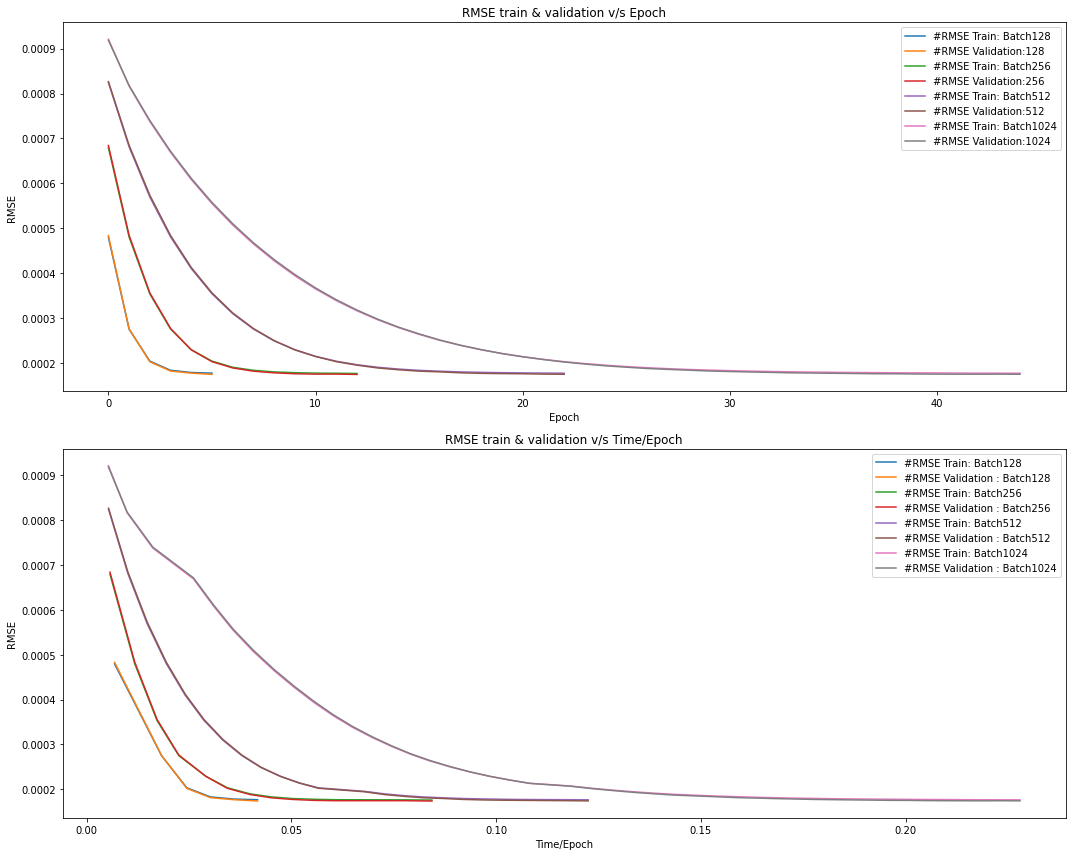

No handles with labels found to put in legend.


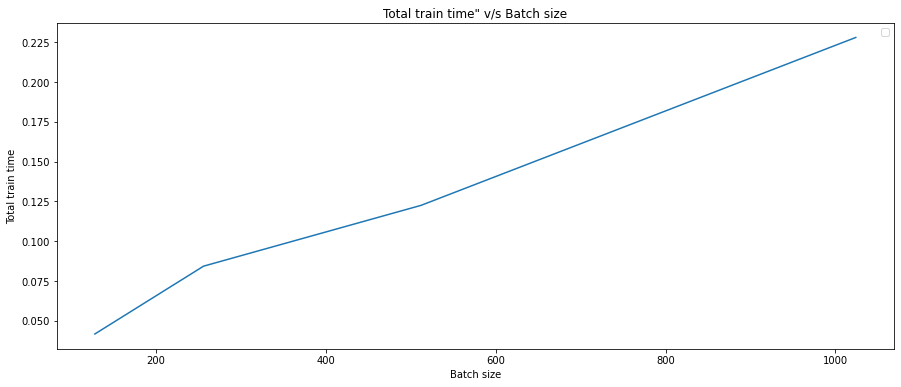

In [ ]:
### Plotting graphs part 4 ###

total_time_4b = np.zeros((0,0))
batch_size_4b = np.zeros((0,0))

fig, axs = plt.subplots(2,figsize=(15, 6*2), squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range (1,11):
  
  mini_grad_results_4b = mini_batch_grad_decent(X_trn_bias, y_train_np, X_val_bias, y_val_np, batchsize_n= 2**i, alpha_lr = 0.01, Conv_threshold = CT)

  w_final_4b = mini_grad_results_4b[0]         #### Storing return values in variables
  RMSE_train_4b = mini_grad_results_4b[1]
  RMSE_val_4b = mini_grad_results_4b[2]
  time_epoch_4b = mini_grad_results_4b[3]
  converged_4b = mini_grad_results_4b[4]


  if converged_4b == 1 :                     ### Condition to plot converging batchs 
    total_time_4b = np.append(total_time_4b,time_epoch_4b[-1])
    batch_size_4b = np.append(batch_size_4b,2**i)

  
  ### Plot 4.1 RSME training and validation vs Epoch
    
    axs[0, 0].plot(RMSE_train_4b,label=('#RMSE Train: Batch{}'.format(2**i)))                    ### Plot results
    axs[0, 0].plot(RMSE_val_4b,label=('#RMSE Validation:{}'.format(2**i)))
    axs[0, 0].set_title('RMSE train & validation v/s Epoch')
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("RMSE")
    axs[0, 0].legend()
    
  ### Plot 4.2a RSME Train and validation vs Time
    axs[1, 0].plot(time_epoch_4b,RMSE_train_4b,label=('#RMSE Train: Batch{}'.format(2**i)))                    ### Plot results
    axs[1, 0].plot(time_epoch_4b,RMSE_val_4b,label=('#RMSE Validation : Batch{}'.format(2**i)))
    axs[1, 0].set_title('RMSE train & validation v/s Time/Epoch')
    axs[1, 0].set_xlabel("Time/Epoch")
    axs[1, 0].set_ylabel("RMSE")
    axs[1, 0].legend()
    plt.tight_layout()

plt.show()

### Plot 4.3 Total train time vs Batchsize
plt.figure(figsize=(15, 6))
plt.plot(batch_size_4b,total_time_4b)
plt.title('Total train time" v/s Batch size',)
plt.xlabel("Batch size")
plt.ylabel("Total train time")
plt.legend()


***Answer Part 4:
For the mini batch gradient descent, it is observed that smaller batch (2,4,8,16,32) tend to diverge and we don’t get optimum running time for these batch.
-For batch 64 it tends to converge on some permutations and diverge on others.
-Slightly higher batch greater than 64 converge for the set hyper parameters. 
-For these converging batches it is observed that as the batch size increases, training time and epochs also increases proportionally. (RMSE training and validation, vs epoch). First plot shows that both training and validation RMSE curves are aligned showing good fit for the data.
- (RMSE training and validation vs time per epoch) plot also has similar pattern. Time increases with increasing batch size. This can be comprehended as, when the batch size is high model has less no of iterations, so weights are not updated with the same rate as compared with lesser batch size. So, to compensate that model needs higher number of epochs to converge. This in turn increases the training time.
- Total training time vs batch size, depicts the increasing time values with the batch size as explained above.
To conclude, it is important to choose an optimum batch size that is neither very small to diverge nor to large to have high training time. Here batch  size 128 has the most optimum running time.***


## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**

In [ ]:
### Part 5 ----------------------------------------------#####
### YOUR CODE HERE ###

def batch_momentum_grad_decent (X_train_bias, y_train_target, X_val_bias, y_valid_target, batchsize_n, alpha_lr, Conv_threshold, beta ):
  X_train_fn = X_train_bias                     ## Assigning value to functions variables
  X_val_fn = X_val_bias
  y_train_fn = y_train_target
  y_val_fn = y_valid_target
  n_fn = batchsize_n
  lr_fn = alpha_lr
  CT_fn = Conv_threshold    ### This is the value calulated from direct solution 1.001 * RMSE_val_direct
  beta_fn = beta

  exit = False  
  converged = 1                      ### Converged batch set to true by default
  change = 0

  w_final = np.zeros((0,0))         ### Empty arrays for return
  RMSE_train_5 = np.zeros((0,0))
  RMSE_val_5 = np.zeros((0,0))
  time_epoch_5 = np.zeros((0,0))

  #w_fn = np.random.uniform(size = 41, low = 0.00001, high = 0.0007)        ### Initial w for first batch alternate method
  w_fn = np.arange(70,111).reshape(1,-1)/1000000                            ### Initial w for first batch, array of 41 values

  start_time = time.time()                                                  ## Records current time
  for epoch in range (0, 1000):                                             ### Main loop for epochs 
                             
    perm = np.random.permutation (len(X_train_fn))                          ### Data shuffled after each iteration
    X_trn_shuf_fn = X_train_fn[perm]
    y_train_shuf_fn = y_train_fn[perm]
  
    n_minibatches = X_trn_shuf_fn.shape[0]//n_fn             ### Calulate no of mini batches from batch size
    i = 0

    for i in range(n_minibatches + 1):                      ## Loop for mini batch
      X_mini_fn = X_trn_shuf_fn[i*n_fn : (i+1)*n_fn :]
      y_mini_fn = y_train_shuf_fn[i*n_fn : (i+1)*n_fn :]

      y_pred_mini_5 = np.dot(X_mini_fn,w_fn.T).reshape (-1,1)
      gradient_fn = ((1/len(y_pred_mini_5) * np.dot(X_mini_fn.T, y_pred_mini_5 - y_mini_fn.reshape(-1,1))).reshape(1,-1))

      new_change = ((beta_fn*change)) + (np.dot((1-beta_fn),gradient_fn))
      
      w_fn = w_fn - lr_fn * new_change   ### weight update

      change = new_change                ### Update value of change

  #    print("w_fn_upper", w_fn)
  #   print("X_mini shape upper",y_pred_mini_5.shape )

    w_final = np.append(w_final, w_fn)                      #### Append final w for each epoch 
    #print(w_final.shape)
    y_pred_train_5 = np.dot(X_train_fn,w_fn.T).reshape (-1,1)             
    RMSE_train_5 = np.append(RMSE_train_5,(rmse(y_pred_train_5 , y_train_fn)))   ## RSME for training set

    y_pred_val_5 = np.dot(X_val_fn,w_fn.T).reshape (-1,1)
    rmse_val_5_fn = rmse(y_pred_val_5,y_val_fn)            
    RMSE_val_5 = np.append(RMSE_val_5,rmse_val_5_fn)                             ## RSME for validation set

    end_time = time.time()                                                       ### end time for a epoch
    time_epoch_5 = np.append(time_epoch_5,(end_time - start_time))
    
    if rmse_val_5_fn <= CT_fn :                                                  ### Condition 1 for threshold 
      print('Batch_size {} converged'.format(n_fn))
      break

    if epoch >= 5 and ((np.mean(RMSE_val_5[-5:-1])) < RMSE_val_5[epoch]):                ### Condition 2 for diverging batch 
     # print("batch not converged")
      print('Batch_size {} NOT converged'.format(n_fn))
      exit = True
      converged = 0               ### Converge set to false
      break

  print("No of epoch runs = ",epoch)

  if exit:                                                 ### If diverged return zero for all arrays
    #print('Batch_size {} not converged'.format(n_fn))
    return 0,0,0,0,0

  return w_final, RMSE_train_5,RMSE_val_5,time_epoch_5,converged

In [ ]:
##Trail##
Result_momentum_64 = batch_momentum_grad_decent(X_trn_bias, y_train_np, X_val_bias, y_val_np, batchsize_n = 1024 , alpha_lr = 0.01, Conv_threshold = CT, beta = 0.2)

Batch_size 1024 converged
No of epoch runs =  48


Batch_size 128 converged
No of epoch runs =  7
Batch_size 128 converged
No of epoch runs =  6
Batch_size 128 converged
No of epoch runs =  6
Batch_size 128 converged
No of epoch runs =  5
Batch_size 128 converged
No of epoch runs =  6
Batch_size 128 converged
No of epoch runs =  5
Batch_size 128 converged
No of epoch runs =  7
Batch_size 128 converged
No of epoch runs =  6
Batch_size 128 converged
No of epoch runs =  8
Batch_size 128 converged
No of epoch runs =  6


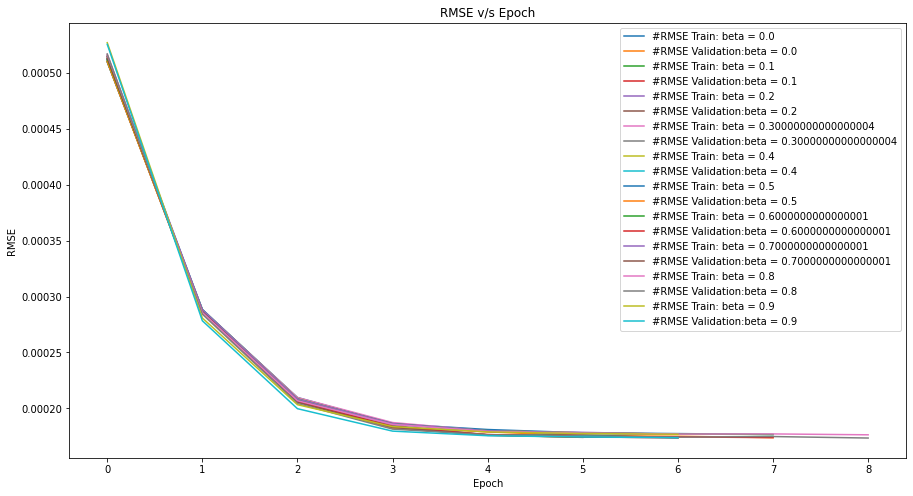

No handles with labels found to put in legend.



Table for beta and training time


,Beta,Training time
0,0.0,0.069412
1,0.1,0.061069
2,0.2,0.058671
3,0.3,0.047527
4,0.4,0.068322
5,0.5,0.051553
6,0.6,0.073027
7,0.7,0.065138
8,0.8,0.069121
9,0.9,0.047060


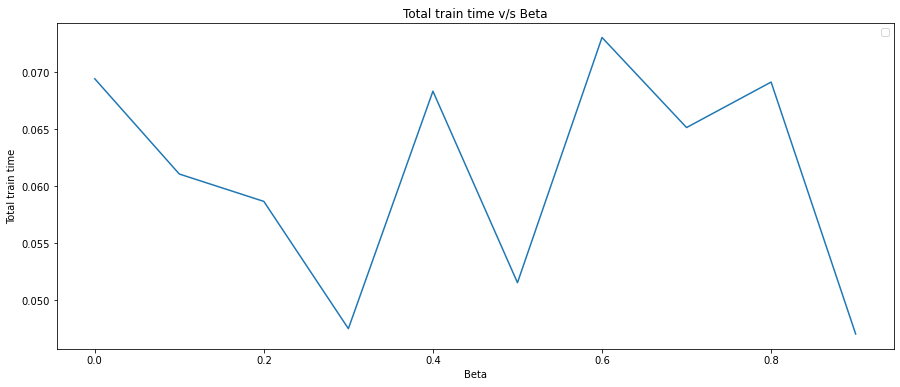

In [ ]:
### Plotting graphs part ###

total_time_5 = np.zeros((0,0))
beta_5 = np.zeros((0,0))

fig, axs = plt.subplots(1,figsize=(15, 8), squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in np.arange(0.0,1.0,0.1):
  
  batch_momentum_grad_decent_5 = batch_momentum_grad_decent(X_trn_bias, y_train_np, X_val_bias, y_val_np, batchsize_n= 128, alpha_lr = 0.01, Conv_threshold = CT,beta = i)

  w_final_5 = batch_momentum_grad_decent_5[0]
  RMSE_train_5 = batch_momentum_grad_decent_5[1]
  RMSE_val_5 = batch_momentum_grad_decent_5[2]
  time_epoch_5 = batch_momentum_grad_decent_5[3]
  converged_5 = batch_momentum_grad_decent_5[4]


  if converged_5 == 1 :
    total_time_5 = np.append(total_time_5,time_epoch_5[-1])
    beta_5 = np.append(beta_5,i)

  
  ### Plot 5.1a RSME training vs Epoch
    #fig, axs = plt.subplots(1,figsize=(15, 8), squeeze=False)
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs[0, 0].plot(RMSE_train_5,label=('#RMSE Train: beta = {}'.format(i)))                    ### Plot results
    axs[0, 0].plot(RMSE_val_5,label=('#RMSE Validation:beta = {}'.format(i)))
    axs[0, 0].set_title('RMSE v/s Epoch')
    axs[0, 0].legend()
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("RMSE")
plt.show()

### Plot 4.3 Total train time vs Batchsize
plt.figure(figsize=(15, 6))
plt.plot(beta_5,total_time_5)
plt.title('Total train time v/s Beta')
plt.legend()
plt.xlabel("Beta")
plt.ylabel("Total train time")

print ("\nTable for beta and training time" )
Table_5 = pd.DataFrame(data = [beta_5, total_time_5]).T   ## Dataframe with F1 scores with corresponding c values
Table_5.columns=['Beta','Training time']
Table_5


***Answer part 5: 
Gradient descent with momentum is the technique which helps to accelerate gradients vectors in the right directions, thus leading to faster converging. For this dataset, batch size of 128 is the selected with mini batch gradient descent which shows the minimum total time in part 4, on applying momentum different values of beta (0.0 to 0.9) it can be observe time taken for total training is reduced. For beta = 0 which equivalent to mini batch descent. Few values of beta (0.4,0.6,0.8) we get higher training time. Best training time is achieved at beta = 0.9. which can be seen in the plot and the table. RMSE plots shows good fit for all beta values which is comparable to mini batch part.***


## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

*** Answer Part 6.1: For the final evaluation, Gradient descent with mini batch and momentum is used with following parameters.
-Alpha (learning rate) = 0.01 \
-Mini batch with size 128 per batch is used as it gave minimum total running time while evaluation in part 4 model. \
-Beta = 0.9 is used for momentum, as it performed best in part 5 momentum model for training time.
-Threshold (CT) is used as 1.001* RMSE from direct solution to test convergence of data set.***


Batch_size 128 converged
No of epoch runs =  7
RMSE training :  0.0001768402502130858
RMSE test  :  0.00017291924538994632
Total time in secs :  0.06811809539794922


Text(0, 0.5, 'RMSE')

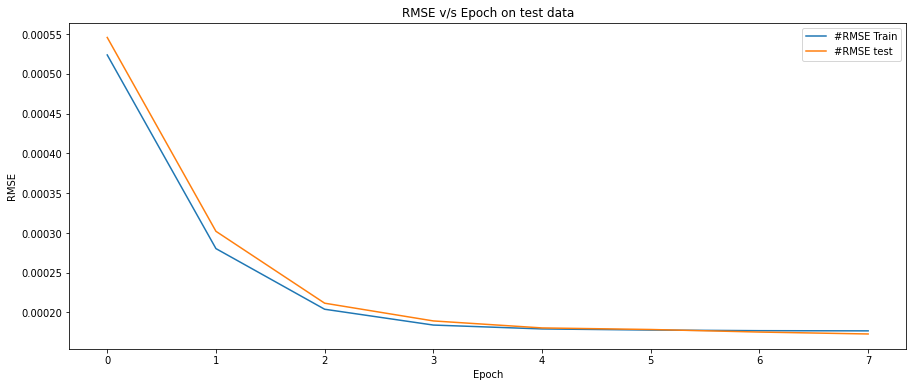

In [ ]:
### Part 6--------------------------####
# Final model #

final_model_6 = batch_momentum_grad_decent(X_trn_bias, y_train_np, X_test_bias, y_test_np, batchsize_n= 128, alpha_lr = 0.01, Conv_threshold = CT,beta = 0.9)

w_final_6 = final_model_6[0]
RMSE_train_6 = final_model_6[1]
RMSE_val_6 = final_model_6[2]
time_epoch_6 = final_model_6[3]

print('RMSE training : ' , RMSE_train_6 [-1] )
print('RMSE test  : ', RMSE_val_6[-1] )
print('Total time in secs : ', time_epoch_6[-1])


plt.figure(figsize=(15, 6))
plt.plot(RMSE_train_6,label=('#RMSE Train'))                    ### Plot results
plt.plot(RMSE_val_6,label=('#RMSE test'))
plt.title('RMSE v/s Epoch on test data')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")

***Answer Part 6.2: To summarize the model performance for managing ailerons of the aircraft.
Primary objective of this model is to minimize the error function and find the optimal values for the parameters. To attain this model learns from the dataset of over 9500 observations, input from 40 different parameters is used to predict the goal of the dataset. The trained model is optimized with validation data which makes prediction and cost i.e., the error is calculated to observe the offset. We use gradient descent to minimize the error and optimize the parameters and eventually the time. \ Here two additional methods are implemented along with gradient descent to accelerate this process. One uses mini batch technique to calculate weights that dampens the error faster and other is momentum which helps to accelerate the data convergence, it does so by eliminating the gradients moving towards the uncommon directions. \
Our final evaluation gives the prediction of RMSE test of 0.000173 with time of (0.05-0.07) secs. This shows that model could achieve its objective of minimizing the error. This a linear model and for this supervised learning we can make further predictions for the controller to give signals to actuators that controls the ailerons. When this trained model is provided new data in real time, based on our test results it will allow to make dynamic corrections to maintain the desired position of the plane. ***


